# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How is crime distributed in 78746?</a></li>
><li><a href="#q8"> 8. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed?
><li><a href="#q9"> 9. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q10"> 10. How is crime distributed across different
><li><a href="#q11"> 11. How does violent crime appear on the map?
><li><a href="#q12"> 12. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [1]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import itertools
import warnings

plt.style.use("seaborn")
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv("Crime_Reports.csv")

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328255 entries, 0 to 2328254
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 166
Occurred Date                        0
Occurred Time                       85
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    21071
Address                             12
Zip Code                         14411
Council District                 47533
APD Sector                        9168
APD District                      9652
PRA                              10938
Census Tract                    552192
Clearance Status                609640
Clearance Date                  340446
UCR Category                   1532918
Category Description           1532918
X-coordinate                     10339
Y-coordinate                     10339
Latitude                         39412
Longitude                

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20191571574,FRAUD - OTHER,1199,N,06/03/2019 04:00:00 PM,06/03/2019,1600.0,06/06/2019 05:34:00 PM,06/06/2019,1734.0,DEPARTMENT / DISCOUNT STORE,10817 BALLARD PATH,78717.0,6.0,AD,5,573.0,203.11,NaN,NaN,NaN,NaN,3097785.0,3097785.0,30.483646,-97.789495,"(30.48364631, -97.7894953)"
1,20191550153,DEADLY CONDUCT,408,N,06/04/2019 03:12:00 AM,06/04/2019,312.0,06/04/2019 03:16:00 AM,06/04/2019,316.0,RESIDENCE / HOME,8312 N IH 35 SVRD SB,78753.0,4.0,ED,1,250.0,18.06,N,06/06/2019,13A,Aggravated Assault,3128227.0,3128227.0,30.346646,-97.696573,"(30.34664576, -97.69657342)"
2,20195022816,THEFT OF LICENSE PLATE,614,N,06/03/2019 03:00:00 PM,06/03/2019,1500.0,06/04/2019 03:22:00 PM,06/04/2019,1522.0,RESIDENCE / HOME,6312 LIBYAN DR,78745.0,2.0,FR,4,509.0,24.09,N,06/04/2019,23G,Theft,3098393.0,3098393.0,30.205267,-97.794900,"(30.20526729, -97.79490043)"
3,20205007833,RUNAWAY CHILD,4100,N,02/22/2020 06:00:00 PM,02/22/2020,1800.0,02/24/2020 06:03:00 PM,02/24/2020,1803.0,RESIDENCE / HOME,13012 DEARBONNE DR,78617.0,2.0,HE,7,612.0,NaN,N,03/03/2020,NaN,NaN,3155456.0,3155456.0,30.176140,-97.615031,"(30.17613952, -97.6150307)"
4,20191671388,BURGLARY OF RESIDENCE,500,N,06/14/2019 12:00:00 PM,06/14/2019,1200.0,06/16/2019 10:00:00 PM,06/16/2019,2200.0,RESIDENCE / HOME,3809 SPICEWOOD SPRINGS RD EB,78731.0,10.0,BA,8,256.0,17.51,N,09/18/2019,220,Burglary,3111039.0,3111039.0,30.364987,-97.750587,"(30.36498691, -97.75058749)"


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2328250,20143631822,FAMILY DISTURBANCE,3400,N,12/29/2014 11:41:00 PM,12/29/2014,2341.0,12/29/2014 11:41:00 PM,12/29/2014,2341.0,RESIDENCE / HOME,109 MASTERSON PASS,78753.0,4.0,ED,1,240,18.23,N,01/02/2015,NaN,NaN,3130776.0,3130776.0,30.369795,-97.687855,"(30.36979494, -97.68785533)"
2328251,20191270738,THEFT BY SHOPLIFTING,607,N,05/07/2019 10:50:00 AM,05/07/2019,1050.0,05/07/2019 11:31:00 AM,05/07/2019,1131.0,DEPARTMENT / DISCOUNT STORE,11423 N LAMAR BLVD,78753.0,7.0,ED,4,221,18.24,NaN,NaN,23C,Theft,3131578.0,3131578.0,30.383630,-97.684932,"(30.38362955, -97.68493154)"
2328252,2008501470,CRIMINAL TRESPASS/TRANSIENT,2721,N,02/19/2008 05:00:00 PM,02/19/2008,1700.0,02/19/2008 05:00:00 PM,02/19/2008,1700.0,PARKING LOTS / GARAGE,6800 BERKMAN DR,78723.0,1.0,ID,5,293,21.00,NaN,NaN,NaN,NaN,3130390.0,3130390.0,30.320281,-97.690437,"(30.32028083, -97.6904366)"
2328253,2003921400113,DWI,2100,N,05/20/2003 01:32:00 AM,05/20/2003,132.0,05/20/2003 01:32:00 AM,05/20/2003,132.0,STREETS / HWY / ROAD / ALLEY,4500 N MOPAC EXPY NB,78731.0,10.0,BA,6,325,1.00,C,05/22/2003,NaN,NaN,3109748.0,3109748.0,30.320565,-97.755869,"(30.32056515, -97.7558693)"
2328254,20081340129,URINATING IN PUBLIC PLACE,3212,N,05/13/2008 01:10:00 AM,05/13/2008,110.0,05/13/2008 01:10:00 AM,05/13/2008,110.0,STREETS / HWY / ROAD / ALLEY,400 BLOCK E 6TH ST,78701.0,9.0,GE,2,382,11.00,C,05/17/2008,NaN,NaN,3115491.0,3115491.0,30.267351,-97.739093,"(30.26735144, -97.73909331)"


## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
def clean_data(df):
    drop_col = [
        "Incident Number",
        "Occurred Time",
        "Occurred Date Time",
        "Highest Offense Code",
        "Census Tract",
        "PRA",
        "Report Date",
        "Report Time",
        "UCR Category",
        "Category Description",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
        "clearance_status",
    ]
    df[fillna].fillna("N/A", inplace=True)
    date_col = ["occurred_date", "report_date_time", "clearance_date"]
    cat_col = [
        "highest_offense_description",
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
    ]
    df[date_col] = df[date_col].astype("datetime64")
    df[cat_col] = df[cat_col].astype("category")
    df["year"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.day
    df.set_index(["occurred_date"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

In [5]:
# Checking for and removing any duplicates
df.duplicated().sum()

836

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
# Re-examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2327419 entries, 2003-01-01 to 2021-04-24
Data columns (total 17 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   highest_offense_description  category      
 1   family_violence              object        
 2   report_date_time             datetime64[ns]
 3   location_type                category      
 4   address                      object        
 5   zip_code                     category      
 6   council_district             category      
 7   apd_sector                   category      
 8   apd_district                 category      
 9   clearance_status             object        
 10  clearance_date               datetime64[ns]
 11  latitude                     float64       
 12  longitude                    float64       
 13  year                         int64         
 14  month                        int64         
 15  week                         int64

None

highest_offense_description         0
family_violence                     0
report_date_time                    1
location_type                   21060
address                            12
zip_code                        14406
council_district                47515
apd_sector                       9164
apd_district                     9648
clearance_status               609404
clearance_date                 340285
latitude                        39384
longitude                       39384
year                                0
month                               0
week                                0
day                                 0
dtype: int64

,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2003-01-01,THEFT BY SHOPLIFTING,N,2003-01-01 15:40:00,GROCERY / SUPERMARKET,2400 S CONGRESS AVE,78704.0,3.0,DA,2,C,2003-01-02,30.238291,-97.754594,2003,1,1,1
2003-01-01,CRIMINAL MISCHIEF,N,2003-01-01 03:46:00,RESIDENCE / HOME,2907 PECAN SPRINGS RD,78723.0,1.0,ID,4,N,NaT,30.300496,-97.684617,2003,1,1,1
2003-01-01,EXPLOSIVE ORDNANCE DISPOSAL,N,2003-01-01 13:06:00,RESIDENCE / HOME,13002 STATON DR,78727.0,7.0,AD,3,N,2003-02-07,30.420545,-97.687472,2003,1,1,1
2003-01-01,FAMILY DISTURBANCE,N,2003-01-01 11:11:00,COMMERCIAL / OFFICE BUILDING,13200 POND SPRINGS RD,78729.0,6.0,AD,4,N,2003-01-08,30.445010,-97.778843,2003,1,1,1
2003-01-01,DISTURBANCE - OTHER,N,2003-01-01 02:19:00,STREETS / HWY / ROAD / ALLEY,2600 BLOCK GWENDOLYN LN,78748.0,5.0,FR,1,N,2003-01-15,30.174853,-97.836622,2003,1,1,1


,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2021-04-24,IDENTITY THEFT,N,2021-04-24 20:16:00,RESIDENCE / HOME,5208 ALLAMANDA DR,78739.0,8.0,DA,8,NaN,NaT,30.169857,-97.889550,2021,4,16,24
2021-04-24,DATING DISTURBANCE,N,2021-04-24 21:53:00,RESIDENCE / HOME,5219 TAHOE TRL,78745.0,5.0,DA,4,NaN,NaT,30.224234,-97.804255,2021,4,16,24
2021-04-24,ASSAULT BY THREAT,N,2021-04-24 17:34:00,RESIDENCE / HOME,5001 CONVICT HILL RD,78749.0,8.0,DA,7,NaN,NaT,30.217147,-97.853212,2021,4,16,24
2021-04-24,THEFT,N,2021-04-24 14:14:00,RESIDENCE / HOME,9323 MENCHACA RD,78748.0,5.0,FR,1,NaN,NaT,30.178575,-97.819372,2021,4,16,24
2021-04-24,THEFT,N,2021-04-24 14:39:00,STREETS / HWY / ROAD / ALLEY,3915 GUADALUPE ST,78751.0,9.0,BA,5,NaN,NaT,30.304834,-97.736304,2021,4,16,24


## III. Exploratory Analysis

<a id='q1'></a>
### A. What areas of Austin have the highest crime rates? 

78741.0    208615
78753.0    180906
78701.0    169738
78758.0    161358
78704.0    156292
78745.0    152441
78702.0    137747
78744.0    127597
78723.0    119681
78752.0     85321
78748.0     69017
78759.0     67239
78751.0     64829
78757.0     58648
78705.0     57769
78721.0     48165
78749.0     40892
78724.0     38053
78727.0     36353
78703.0     35621
78731.0     29076
78746.0     28387
78729.0     25711
78750.0     24083
78754.0     23275
Name: zip_code, dtype: int64

78741.0    0.090192
78753.0    0.078212
78701.0    0.073384
78758.0    0.069761
78704.0    0.067571
78745.0    0.065906
78702.0    0.059553
78744.0    0.055165
78723.0    0.051742
78752.0    0.036887
78748.0    0.029839
78759.0    0.029070
78751.0    0.028028
78757.0    0.025356
78705.0    0.024976
78721.0    0.020823
78749.0    0.017679
78724.0    0.016452
78727.0    0.015717
78703.0    0.015400
78731.0    0.012571
78746.0    0.012273
78729.0    0.011116
78750.0    0.010412
78754.0    0.010063
Name: zip_code, dtype: float64

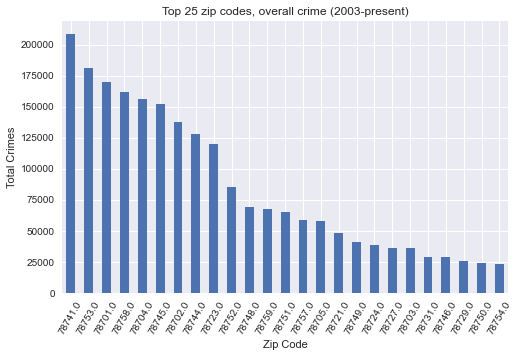

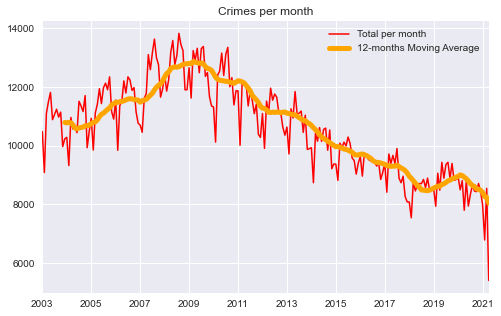

In [9]:
# Create and display dataframes for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25))
display(df.zip_code.value_counts(normalize=True).head(25))

# Visualizing the top 25 crime-ridden zip codes in Austin
df.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes, overall crime (2003-present)",
    figsize=(8, 5),
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
)
plt.show()

# Creating a time series plot with a 12 month rolling average
plt.figure(figsize=(8, 5))
df.resample("M").size().plot(color="red", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="orange", linewidth=5, label="12-months Moving Average"
)
plt.title("Crimes per month")
plt.xlabel("")
plt.legend()
plt.show()

In [10]:
df.zip_code.value_counts().to_frame()

,zip_code
78741.0,208615
78753.0,180906
78701.0,169738
78758.0,161358
78704.0,156292
...,...
78626.0,3
78642.0,2
78628.0,1
78619.0,1


### B. Examining the top crime types in Austin 

BURGLARY OF VEHICLE               232165
THEFT                             213213
FAMILY DISTURBANCE                181867
CRIMINAL MISCHIEF                 128654
ASSAULT W/INJURY-FAM/DATE VIOL     78770
BURGLARY OF RESIDENCE              77475
DWI                                70027
PUBLIC INTOXICATION                68944
HARASSMENT                         64830
DISTURBANCE - OTHER                62161
Name: highest_offense_description, dtype: int64

,BURGLARY OF VEHICLE,CRIMINAL MISCHIEF,FAMILY DISTURBANCE,BURGLARY OF RESIDENCE,ASSAULT W/INJURY-FAM/DATE VIOL,DWI,HARASSMENT,PUBLIC INTOXICATION,TOTAL
occurred_date,,,,,,,,,
2020-12-31,409,478,825,187,253,165,252,50,2619
2021-01-31,360,432,815,128,256,168,254,55,2468
2021-02-28,310,338,813,116,245,130,166,62,2180
2021-03-31,431,428,876,156,258,179,191,75,2594
2021-04-30,264,264,487,78,199,98,111,50,1551


<Figure size 432x288 with 0 Axes>

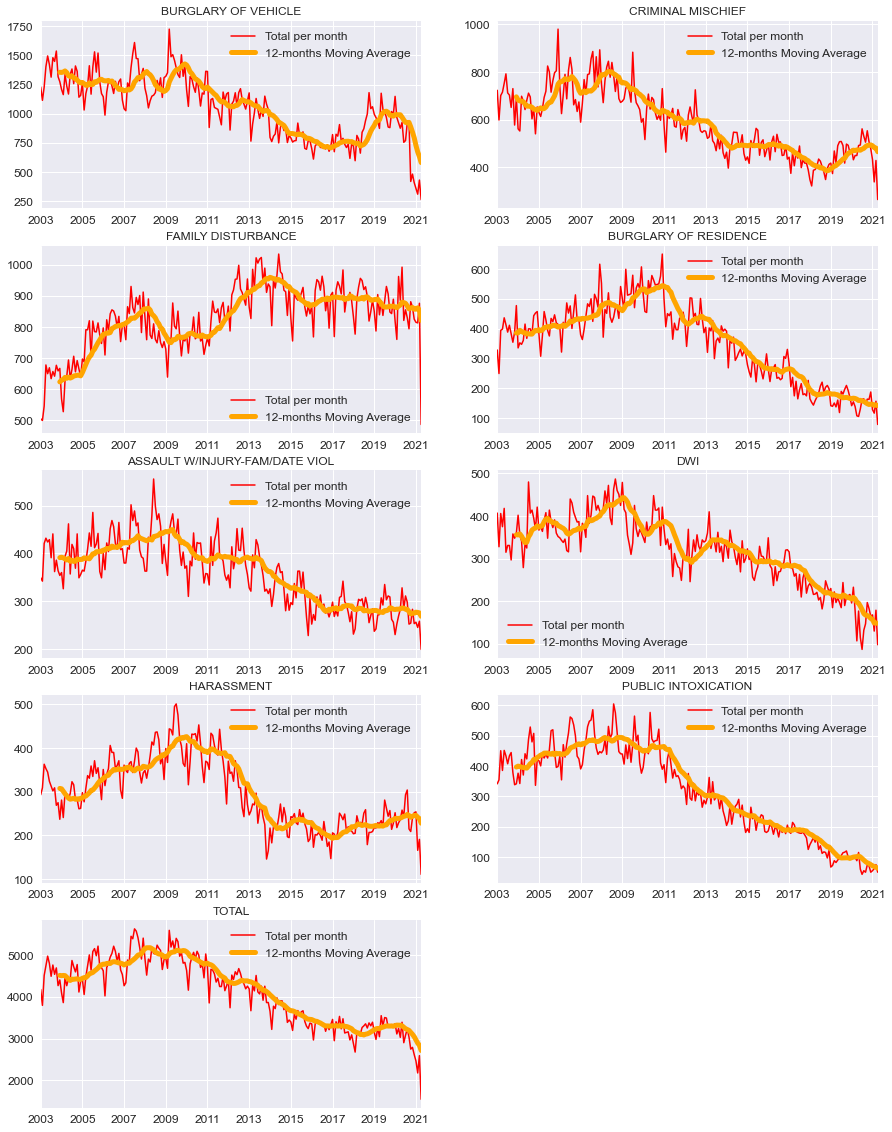

In [11]:
display(df["highest_offense_description"].value_counts().head(10))

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION", "HARASSMENT"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly.tail())

plt.figure(1)
plt.figure(figsize=(15, 20))

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

PUBLIC INTOXICATION               17193
THEFT                             15896
BURGLARY OF VEHICLE                9319
WARRANT ARREST NON TRAFFIC         8967
DWI                                8351
ASSAULT WITH INJURY                7602
VIOL CITY ORDINANCE - OTHER        6191
POSS OF DRUG PARAPHERNALIA         6079
CRIMINAL MISCHIEF                  5890
CRIMINAL TRESPASS                  3944
POSSESSION OF MARIJUANA            3403
DISTURBANCE - OTHER                3384
CUSTODY ARREST TRAFFIC WARR        2993
POSS CONTROLLED SUB/NARCOTIC       2920
CAMPING IN PARK                    2785
VOCO - ALCOHOL  CONSUMPTION        2690
ASSAULT BY CONTACT                 2617
CRIMINAL TRESPASS/TRANSIENT        2592
THEFT OF BICYCLE                   2535
URINATING IN PUBLIC PLACE          2337
FAMILY DISTURBANCE                 2201
DOC FIGHTING                       2132
PROTECTIVE ORDER                   2099
ASSAULT W/INJURY-FAM/DATE VIOL     1742
Name: highest_offense_description, dtype

PUBLIC INTOXICATION               0.101291
THEFT                             0.093650
BURGLARY OF VEHICLE               0.054902
WARRANT ARREST NON TRAFFIC        0.052828
DWI                               0.049199
ASSAULT WITH INJURY               0.044787
VIOL CITY ORDINANCE - OTHER       0.036474
POSS OF DRUG PARAPHERNALIA        0.035814
CRIMINAL MISCHIEF                 0.034701
CRIMINAL TRESPASS                 0.023236
POSSESSION OF MARIJUANA           0.020049
DISTURBANCE - OTHER               0.019937
CUSTODY ARREST TRAFFIC WARR       0.017633
POSS CONTROLLED SUB/NARCOTIC      0.017203
CAMPING IN PARK                   0.016408
VOCO - ALCOHOL  CONSUMPTION       0.015848
ASSAULT BY CONTACT                0.015418
CRIMINAL TRESPASS/TRANSIENT       0.015271
THEFT OF BICYCLE                  0.014935
URINATING IN PUBLIC PLACE         0.013768
FAMILY DISTURBANCE                0.012967
DOC FIGHTING                      0.012561
PROTECTIVE ORDER                  0.012366
ASSAULT W/I

<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

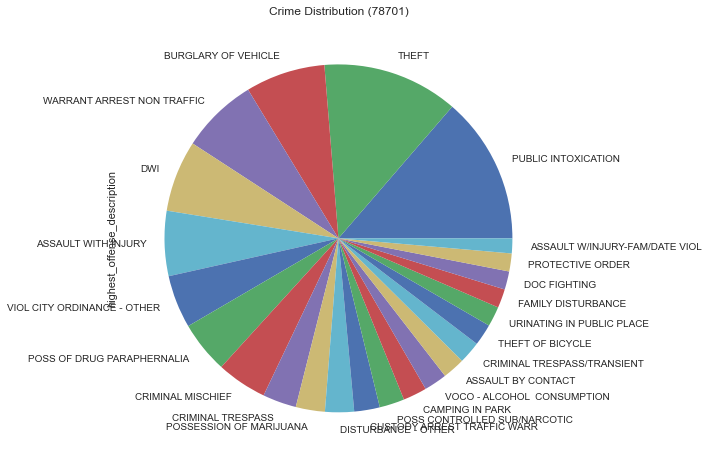

In [12]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off)
display(df_01.highest_offense_description.value_counts(normalize=True).head(24))
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### D. How is crime distributed in 78753 (Rundberg & N Lamar)? 

THEFT                             17252
BURGLARY OF VEHICLE               16013
FAMILY DISTURBANCE                14836
CRIMINAL MISCHIEF                  9547
THEFT BY SHOPLIFTING               7688
ASSAULT W/INJURY-FAM/DATE VIOL     7239
BURGLARY OF RESIDENCE              6099
DWI                                5063
DISTURBANCE - OTHER                4812
CUSTODY ARREST TRAFFIC WARR        4347
AUTO THEFT                         4292
HARASSMENT                         4291
POSS OF DRUG PARAPHERNALIA         3735
PUBLIC INTOXICATION                3377
ASSAULT WITH INJURY                3362
CRIMINAL TRESPASS                  3176
POSS CONTROLLED SUB/NARCOTIC       3003
RUNAWAY CHILD                      2956
WARRANT ARREST NON TRAFFIC         2797
POSSESSION OF MARIJUANA            2715
BURGLARY NON RESIDENCE             2513
VIOL CITY ORDINANCE - OTHER        1871
Name: highest_offense_description, dtype: int64
----------------------------------
THEFT                             0.0

<AxesSubplot:title={'center':'Crime Distribution (78753)'}, ylabel='highest_offense_description'>

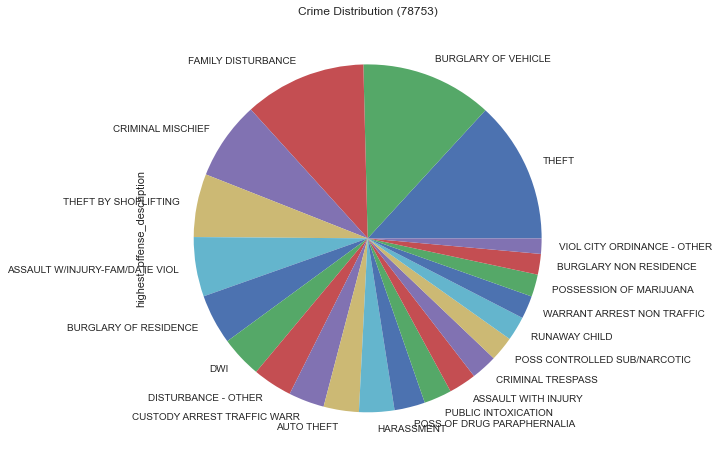

In [18]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
print(df_53_off)
print("----------------------------------")
print(df_53.highest_offense_description.value_counts(normalize=True).head(22))
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### E. How is crime distributed in 78741 (E Riverside/Oltorf)? 

FAMILY DISTURBANCE                20560
BURGLARY OF VEHICLE               19891
THEFT                             15698
CRIMINAL MISCHIEF                 11118
ASSAULT W/INJURY-FAM/DATE VIOL     9688
BURGLARY OF RESIDENCE              8914
PUBLIC INTOXICATION                6397
CUSTODY ARREST TRAFFIC WARR        6011
DWI                                5695
HARASSMENT                         5569
DISTURBANCE - OTHER                5204
AUTO THEFT                         4704
ASSAULT WITH INJURY                4571
CRIMINAL TRESPASS                  3957
POSS CONTROLLED SUB/NARCOTIC       3894
POSSESSION OF MARIJUANA            3802
THEFT BY SHOPLIFTING               3591
POSS OF DRUG PARAPHERNALIA         3548
WARRANT ARREST NON TRAFFIC         3448
RUNAWAY CHILD                      2803
VIOL CITY ORDINANCE - OTHER        2197
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.098555
BURGLARY OF VEHICLE               

<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

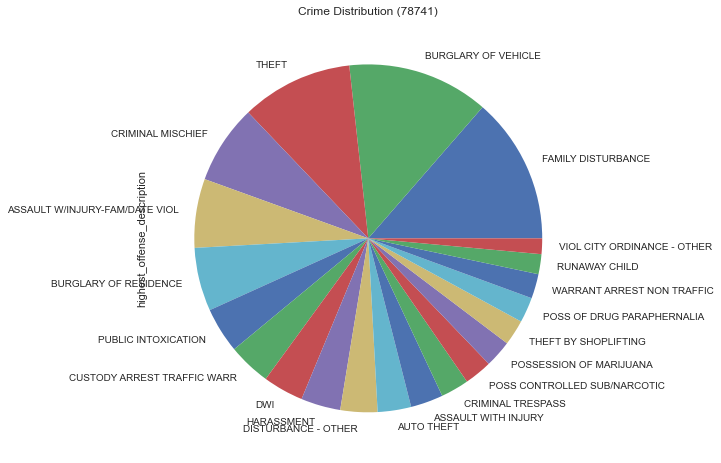

In [19]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
print(df_41_off)
print("----------------------------------")
print(df_41.highest_offense_description.value_counts(normalize=True).head(21))
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### F. How is crime distributed in 78745 (far south Austin)?

FAMILY DISTURBANCE                15130
BURGLARY OF VEHICLE               14788
THEFT                             13644
CRIMINAL MISCHIEF                  8588
BURGLARY OF RESIDENCE              5882
ASSAULT W/INJURY-FAM/DATE VIOL     5792
HARASSMENT                         5176
DISTURBANCE - OTHER                4565
DWI                                4444
PUBLIC INTOXICATION                4010
CUSTODY ARREST TRAFFIC WARR        3248
AUTO THEFT                         2897
BURGLARY NON RESIDENCE             2886
ASSAULT WITH INJURY                2709
RUNAWAY CHILD                      2616
POSSESSION OF MARIJUANA            2594
WARRANT ARREST NON TRAFFIC         2109
POSS CONTROLLED SUB/NARCOTIC       2052
THEFT BY SHOPLIFTING               2010
CRIMINAL TRESPASS                  1970
IDENTITY THEFT                     1666
POSS OF DRUG PARAPHERNALIA         1528
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.0

<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

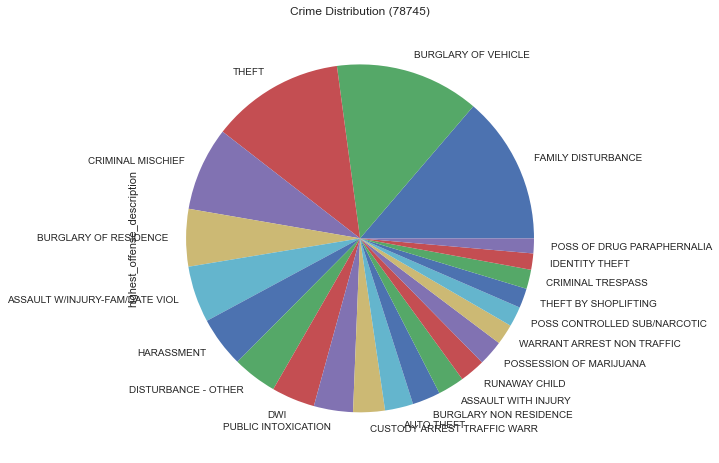

In [20]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
print(df_45_off)
print("----------------------------------")
print(df_45.highest_offense_description.value_counts(normalize=True).head(22))
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### G. How is crime distributed in 78705 (UT campus area)?

BURGLARY OF VEHICLE               8683
THEFT                             5649
CRIMINAL MISCHIEF                 4996
THEFT OF BICYCLE                  3518
PUBLIC INTOXICATION               2633
BURGLARY OF RESIDENCE             2129
WARRANT ARREST NON TRAFFIC        1550
CRIMINAL TRESPASS                 1364
AUTO THEFT                        1353
ASSAULT WITH INJURY               1270
HARASSMENT                        1227
DWI                               1221
FAMILY DISTURBANCE                1218
DISTURBANCE - OTHER               1128
BURGLARY NON RESIDENCE             888
CRIMINAL TRESPASS/TRANSIENT        868
VIOL CITY ORDINANCE - OTHER        792
GRAFFITI                           785
CUSTODY ARREST TRAFFIC WARR        782
ASSAULT W/INJURY-FAM/DATE VIOL     704
POSSESSION OF MARIJUANA            662
ASSAULT BY CONTACT                 626
Name: highest_offense_description, dtype: int64

'----------------------------------'

BURGLARY OF VEHICLE               0.150306
THEFT                             0.097786
CRIMINAL MISCHIEF                 0.086482
THEFT OF BICYCLE                  0.060898
PUBLIC INTOXICATION               0.045578
BURGLARY OF RESIDENCE             0.036854
WARRANT ARREST NON TRAFFIC        0.026831
CRIMINAL TRESPASS                 0.023611
AUTO THEFT                        0.023421
ASSAULT WITH INJURY               0.021984
HARASSMENT                        0.021240
DWI                               0.021136
FAMILY DISTURBANCE                0.021084
DISTURBANCE - OTHER               0.019526
BURGLARY NON RESIDENCE            0.015372
CRIMINAL TRESPASS/TRANSIENT       0.015025
VIOL CITY ORDINANCE - OTHER       0.013710
GRAFFITI                          0.013589
CUSTODY ARREST TRAFFIC WARR       0.013537
ASSAULT W/INJURY-FAM/DATE VIOL    0.012186
POSSESSION OF MARIJUANA           0.011459
ASSAULT BY CONTACT                0.010836
Name: highest_offense_description, dtype: float64

<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

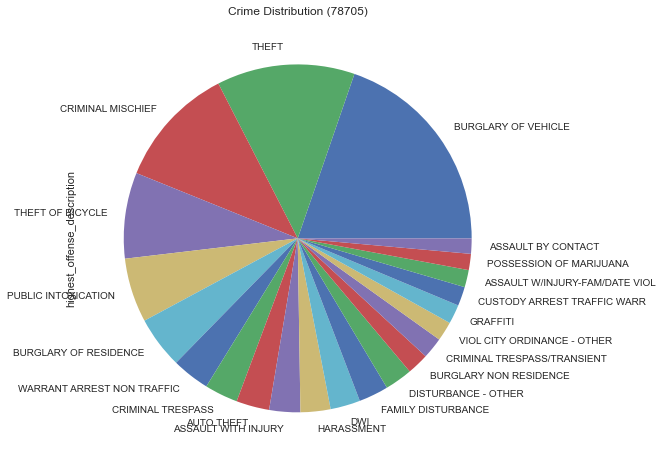

In [21]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off)
display("----------------------------------")
display(df_05.highest_offense_description.value_counts(normalize=True).head(22))
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. How is crime distributed in 78746? 

BURGLARY OF VEHICLE               5422
THEFT                             5106
THEFT BY SHOPLIFTING              2555
CRIMINAL MISCHIEF                 1276
DWI                                884
FAMILY DISTURBANCE                 771
VIOL CITY ORDINANCE - OTHER        652
HARASSMENT                         634
AUTO THEFT                         610
BURGLARY OF RESIDENCE              523
THEFT FROM PERSON                  462
IDENTITY THEFT                     450
DISTURBANCE - OTHER                436
BURGLARY NON RESIDENCE             359
ASSAULT W/INJURY-FAM/DATE VIOL     340
CRED CARD ABUSE - OTHER            329
PUBLIC INTOXICATION                321
POSSESSION OF MARIJUANA            297
FRAUD - OTHER                      282
SUSPICIOUS PERSON                  259
CUSTODY ARREST TRAFFIC WARR        247
WARRANT ARREST NON TRAFFIC         223
ASSAULT WITH INJURY                199
VIOL WATER SAFETY ACT              195
Name: highest_offense_description, dtype: int64

BURGLARY OF VEHICLE               0.191003
THEFT                             0.179871
THEFT BY SHOPLIFTING              0.090006
CRIMINAL MISCHIEF                 0.044950
DWI                               0.031141
FAMILY DISTURBANCE                0.027160
VIOL CITY ORDINANCE - OTHER       0.022968
HARASSMENT                        0.022334
AUTO THEFT                        0.021489
BURGLARY OF RESIDENCE             0.018424
THEFT FROM PERSON                 0.016275
IDENTITY THEFT                    0.015852
DISTURBANCE - OTHER               0.015359
BURGLARY NON RESIDENCE            0.012647
ASSAULT W/INJURY-FAM/DATE VIOL    0.011977
CRED CARD ABUSE - OTHER           0.011590
PUBLIC INTOXICATION               0.011308
POSSESSION OF MARIJUANA           0.010463
FRAUD - OTHER                     0.009934
SUSPICIOUS PERSON                 0.009124
CUSTODY ARREST TRAFFIC WARR       0.008701
WARRANT ARREST NON TRAFFIC        0.007856
ASSAULT WITH INJURY               0.007010
VIOL WATER 

<AxesSubplot:title={'center':'Crime Distribution (78746)'}, ylabel='highest_offense_description'>

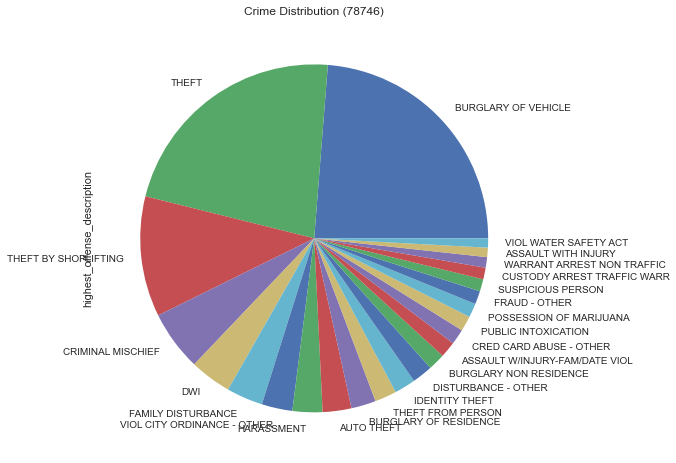

In [22]:
# Examining crime in the 78701 area
df_46 = df[df.zip_code == 78746]

# Create a dataframe for the top crime categories in the zipcode
df_46_off = df_46.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_46_off)
display(df_46.highest_offense_description.value_counts(normalize=True).head(24))
df_46_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78746)")

<a id='q8'></a>
### I. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed? 

In [23]:
# Creating separate dataframes for overall & violent crime
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "AGG ASLT STRANGLE/SUFFOCATE", "AGG ASSAULT FAM/DATE VIOLENCE", "AGG ASSAULT WITH MOTOR VEH", "AGG ASLT ENHANC STRANGL/SUFFOC", "AGG ROBBERY BY ASSAULT", "AGG ASLT W/MOTOR VEH FAM/DAT V", "AGG SEXUAL ASSAULT CHILD/OBJEC", "AGG SEXUAL ASSAULT W OBJECT", "AGG ASSAULT ON PUBLIC SERVANT", "AGG RAPE OF A CHILD", "MURDER", "CAPITAL MURDER", "CRASH/MURDER", "EXPIRED-ATT MURDER", "EXPIRED-ATT CAPITAL MURDER", "RAPE"]'
)
df_viol_mur = df.query(
    'highest_offense_description == ["MURDER", "CAPITAL MURDER", "CRASH/MURDER", "EXPIRED-ATT MURDER", "EXPIRED-ATT CAPITAL MURDER"]'
)
df_agg_asslt = df[df.highest_offense_description == "AGG ASSAULT"]
df_agg_robbery = df[df.highest_offense_description == "AGG ROBBERY/DEADLY WEAPON"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]
df_21 = df[df.year == 2021]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]
df_viol_21 = df_viol[df_viol.year == 2021]

# Annual murders
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]
df_viol_mur_21 = df_viol_mur[df_viol_mur.year == 2021]

78741.0    0.126439
78753.0    0.097746
78758.0    0.093857
78723.0    0.075490
78702.0    0.067450
78745.0    0.061074
78744.0    0.060252
78701.0    0.053635
78752.0    0.049044
78704.0    0.047319
78721.0    0.031760
78724.0    0.026928
78748.0    0.021875
78757.0    0.020010
78705.0    0.016903
78759.0    0.015960
78751.0    0.015920
78727.0    0.010948
78754.0    0.010226
78749.0    0.010085
78617.0    0.009484
78729.0    0.009063
78722.0    0.008361
78750.0    0.006877
78731.0    0.005674
Name: zip_code, dtype: float64

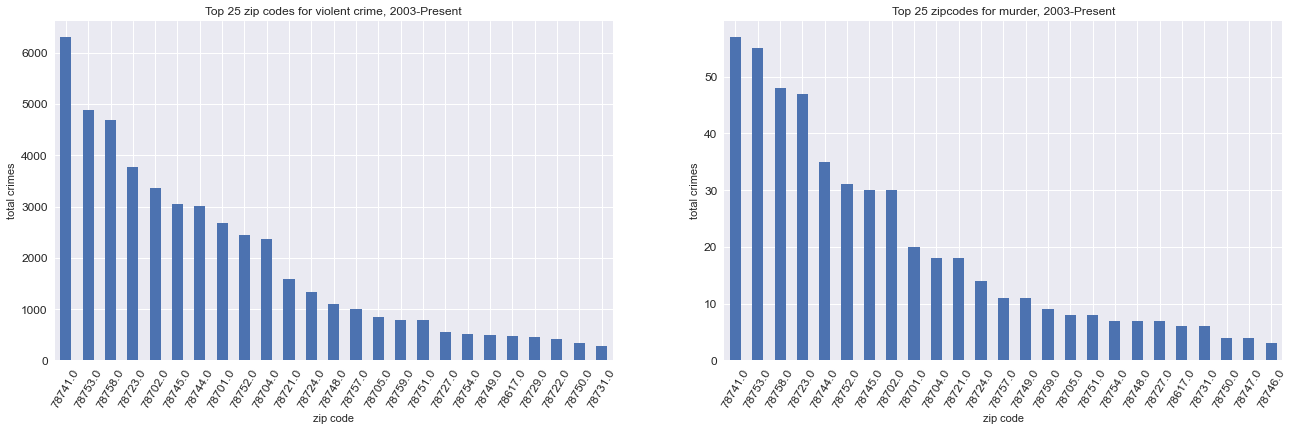

highest_offense_description,AGG ASLT ENHANC STRANGL/SUFFOC,AGG ASLT STRANGLE/SUFFOCATE,AGG ASLT W/MOTOR VEH FAM/DAT V,AGG ASSAULT,AGG ASSAULT FAM/DATE VIOLENCE,AGG ASSAULT ON PUBLIC SERVANT,AGG ASSAULT WITH MOTOR VEH,AGG RAPE OF A CHILD,AGG ROBBERY BY ASSAULT,AGG ROBBERY/DEADLY WEAPON,AGG SEXUAL ASSAULT CHILD/OBJEC,AGG SEXUAL ASSAULT W OBJECT,CAPITAL MURDER,CRASH/MURDER,EXPIRED-ATT CAPITAL MURDER,EXPIRED-ATT MURDER,MURDER,RAPE
zip_code,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
78610.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
78613.0,1,11,4,15,8,0,2,1,2,11,1,0,0,0,0,0,1,7
78617.0,7,69,10,124,103,1,16,13,3,62,21,1,0,0,0,0,6,37
78621.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
78634.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78640.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
78641.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78652.0,0,2,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0


ValueError: num must be 1 <= num <= 15, not 0

<Figure size 432x288 with 0 Axes>

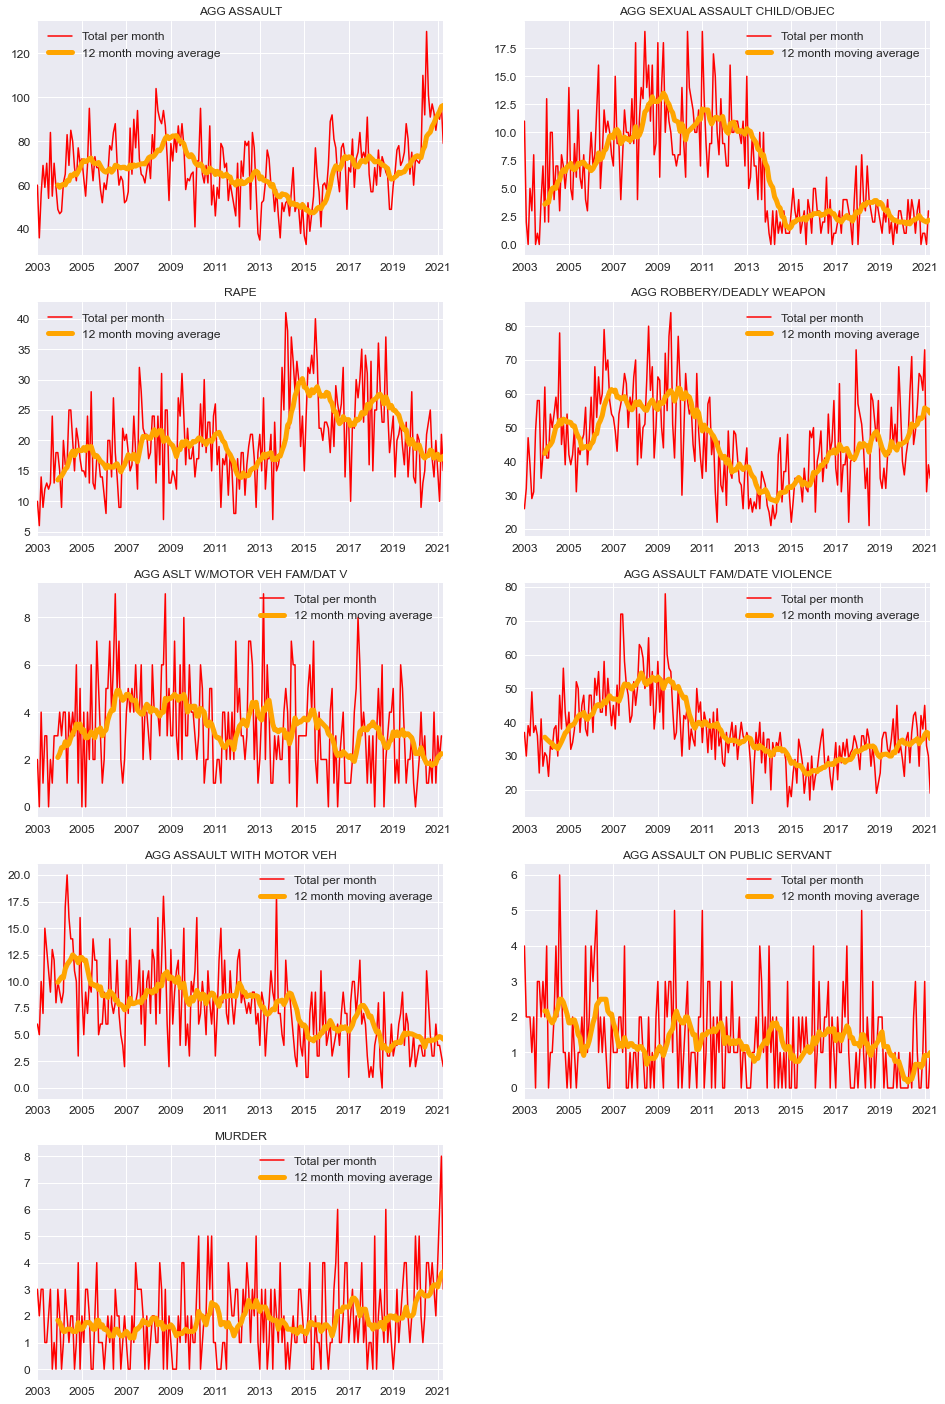

In [24]:
display(df_viol.zip_code.value_counts(normalize=True).head(25))

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2)
df_viol.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes for violent crime, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[0],
)
df_viol_mur.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zipcodes for murder, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.highest_offense_description)
mur_freq = pd.crosstab(df_viol_mur.zip_code, df_viol_mur.highest_offense_description)
display(viol_freq)

monthly = pd.DataFrame(
    df_viol[df_viol["highest_offense_description"] == "AGG ASSAULT"]
    .resample("M")
    .size()
)
monthly.columns = ["AGG ASSAULT"]

for i in df_viol["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df_viol[df_viol["highest_offense_description"] == i].resample("M").size()
    )

monthly["Total"] = monthly.sum(axis=1)

crimeTypes = monthly.columns

plt.figure(1)
plt.figure(figsize=(16, 25))

i = 521
for eachCrime in crimeTypes:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1


viol_freq.to_csv("viol_freq.csv")
mur_freq.to_csv("mur_freq.csv")

### J. Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

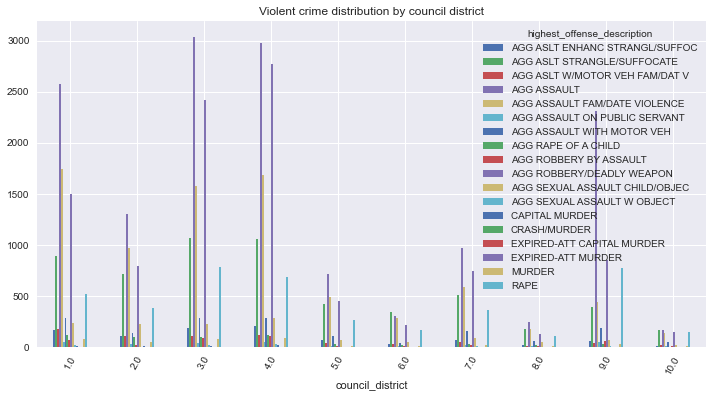

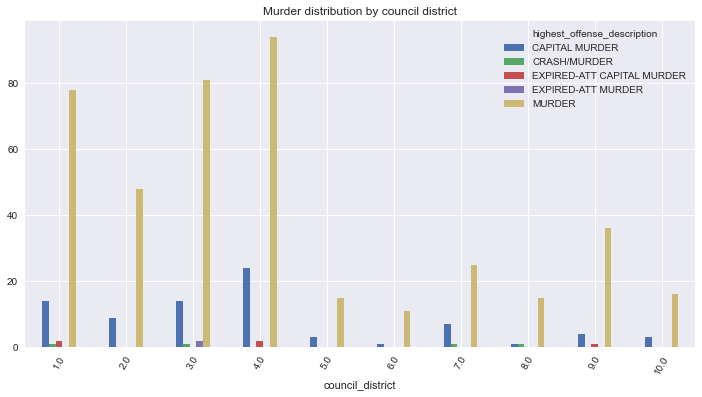

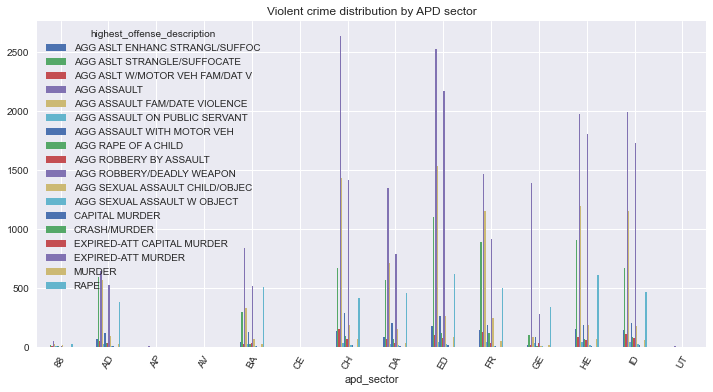

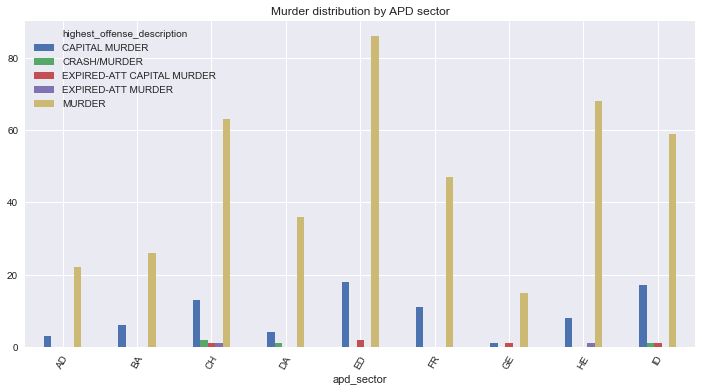

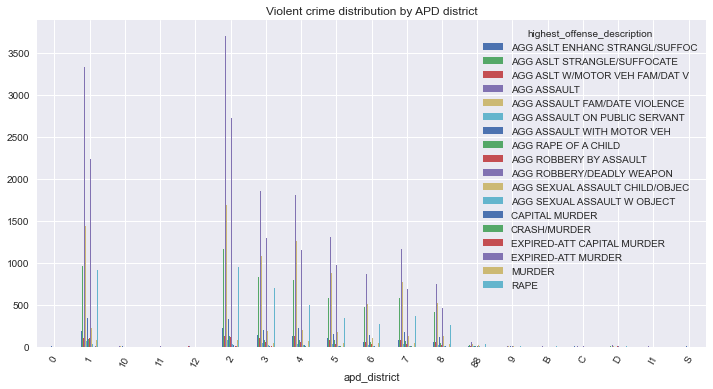

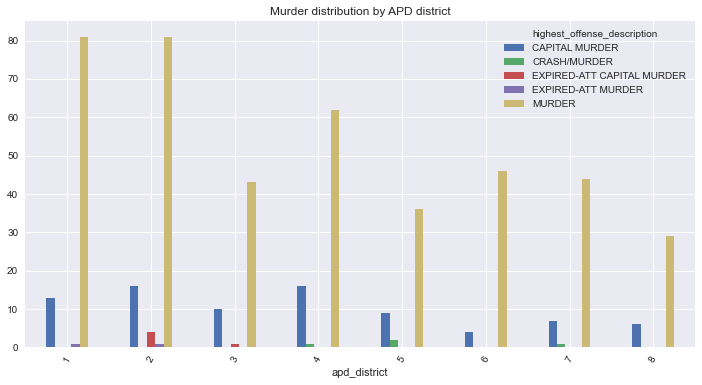

In [30]:
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by council district"
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(figsize=(12, 6), rot=60, title="Murder distribution by council district")
plt.show()

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD district"
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD district"
)
plt.show()

### K. Violent crime and murder distribution by location type

highest_offense_description,AGG ASLT ENHANC STRANGL/SUFFOC,AGG ASLT STRANGLE/SUFFOCATE,AGG ASLT W/MOTOR VEH FAM/DAT V,AGG ASSAULT,AGG ASSAULT FAM/DATE VIOLENCE,AGG ASSAULT ON PUBLIC SERVANT,AGG ASSAULT WITH MOTOR VEH,AGG RAPE OF A CHILD,AGG ROBBERY BY ASSAULT,AGG ROBBERY/DEADLY WEAPON,AGG SEXUAL ASSAULT CHILD/OBJEC,AGG SEXUAL ASSAULT W OBJECT,CAPITAL MURDER,CRASH/MURDER,EXPIRED-ATT CAPITAL MURDER,EXPIRED-ATT MURDER,MURDER,RAPE
location_type,,,,,,,,,,,,,,,,,,
ABANDONED/CONDEMNED STRUCTURE,1,1,0,14,2,0,0,0,0,7,0,0,0,0,0,0,1,4
AMUSEMENT PARK,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0
ARENA / STADIUM / FAIRGROUNDS / COLISEUM,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ATM SEPARATE FROM BANK,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0
AUTO DEALERSHIP NEW / USED,0,0,0,10,0,0,1,0,0,2,0,0,0,0,0,0,0,1
BANKS / SAVINGS & LOAN,0,0,0,5,2,3,1,0,1,134,1,0,0,0,0,0,1,1
BAR / NIGHT CLUB,0,17,0,671,22,5,10,0,5,46,0,0,2,0,0,0,8,79
CAMP / CAMPGROUND,0,9,0,23,7,0,0,0,0,2,0,1,0,0,0,0,0,3
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,0,2,1,20,4,1,2,0,2,5,5,0,1,0,0,0,0,7


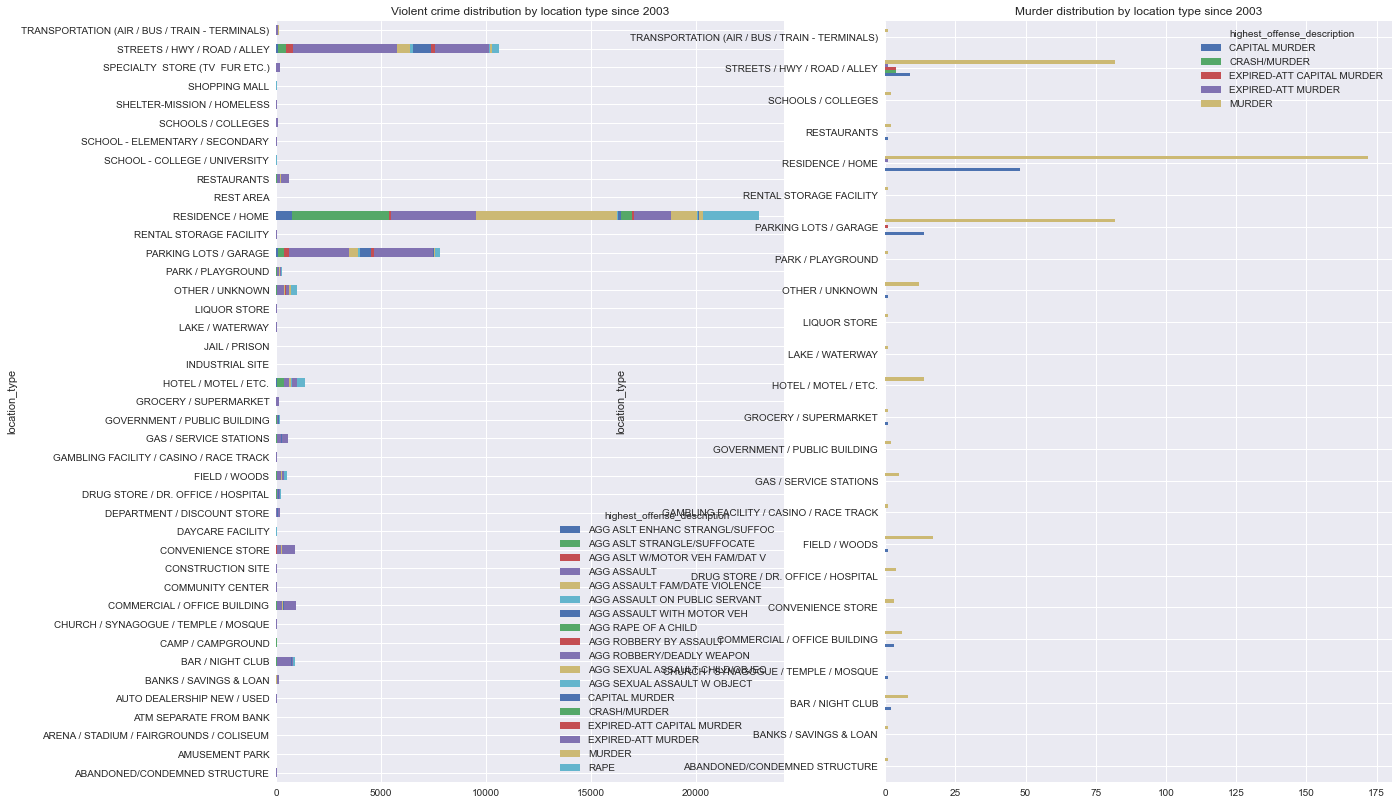

In [31]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)
mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

fig, axs = plt.subplots(figsize=(20, 14), ncols=2)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003",
    ax=axs[0],
    stacked=True,
)
mur_loc.plot.barh(title="Murder distribution by location type since 2003", ax=axs[1])
plt.show()

<a id='q9'></a>
### L. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [32]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Armed robbery 

In [33]:
agg_robbery_coords_heat = df_agg_robbery[
    (df_agg_robbery["latitude"].isnull() == False)
    & (df_agg_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [25]:
mur_coords_heat = df_viol_mur[
    (df_viol_mur["latitude"].isnull() == False)
    & (df_viol_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### M. Are there any addresses where violent crime and murder occurs frequently?

In [26]:
df.address.value_counts().head(50).to_frame()

,address
4110 GUADALUPE ST,11609
1030 NORWOOD PARK BLVD,9231
2901 S CAPITAL OF TEXAS HWY NB,8137
3600 PRESIDENTIAL BLVD,7380
500 E 7TH ST,6122
1000 E 41ST ST,5832
3708 S 2ND ST,5257
2508 E RIVERSIDE DR,4840
11200 LAKELINE MALL DR,4509
9300 S IH 35 SVRD SB,4082


In [27]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(13).to_frame()

,address
1137 GUNTER ST,114
6409 SPRINGDALE RD,112
1700 BURTON DR,105
1071 CLAYTON LN,99
500 E 7TH ST,93
1054 SPRINGDALE RD,93
9200 NORTH PLZ,88
9024 NORTHGATE BLVD,88
6103 MANOR RD,86
1500 FARO DR,84


In [28]:
# Show addresses with 2 or more reported murders
df_viol_mur.address.value_counts().head(30).to_frame()

,address
8800 N IH 35 SVRD SB,3
6407 SPRINGDALE RD,3
8610 N LAMAR BLVD,3
6409 SPRINGDALE RD,3
4700 E RIVERSIDE DR,3
6600 ED BLUESTEIN BLVD SB,2
815 W SLAUGHTER LN,2
201 W 5TH ST,2
7330 BLUFF SPRINGS RD,2
1711 RUTLAND DR,2


In [29]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")
df_21.to_csv("df_21.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")
df_viol_21.to_csv("df_viol_21.csv")

df_viol_mur_17.to_csv("df_viol_mur_17.csv")
df_viol_mur_18.to_csv("df_viol_mur_18.csv")
df_viol_mur_19.to_csv("df_viol_mur_19.csv")
df_viol_mur_20.to_csv("df_viol_mur_20.csv")
df_viol_mur_21.to_csv("df_viol_mur_21.csv")

df_viol.to_csv("df_viol.csv")
df_viol_mur.to_csv("df_viol_mur.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")
df_46.to_csv("df_46.csv")